# Part 2: Scrape and Analyze Mars Weather Data

## Dependencies

In [5]:
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

from webdriver_manager.chrome import ChromeDriverManager

In [6]:
manager = ChromeDriverManager() 
loc = manager.install()
executable_path = {'executable_path': loc}
browser = Browser('chrome', **executable_path, headless=False)

## Step 1: Visit the Website

In [7]:
# Visit the website
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"

browser.visit(url)

In [8]:
# Store the html from the website
html = browser.html

## Step 2: Scrape the Table

In [9]:
# Create a BS object of the html
soup = BeautifulSoup(html, 'html.parser')

In [10]:
# Extract all rows of data
table = soup.table

In [12]:
rows = table.find_all(class_="data-row")

In [15]:
rows

[<tr class="data-row">
 <td>2</td>
 <td>2012-08-16</td>
 <td>10</td>
 <td>155</td>
 <td>6</td>
 <td>-75.0</td>
 <td>739.0</td>
 </tr>,
 <tr class="data-row">
 <td>13</td>
 <td>2012-08-17</td>
 <td>11</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>24</td>
 <td>2012-08-18</td>
 <td>12</td>
 <td>156</td>
 <td>6</td>
 <td>-76.0</td>
 <td>741.0</td>
 </tr>,
 <tr class="data-row">
 <td>35</td>
 <td>2012-08-19</td>
 <td>13</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>732.0</td>
 </tr>,
 <tr class="data-row">
 <td>46</td>
 <td>2012-08-20</td>
 <td>14</td>
 <td>157</td>
 <td>6</td>
 <td>-74.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>57</td>
 <td>2012-08-21</td>
 <td>15</td>
 <td>158</td>
 <td>6</td>
 <td>-78.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>68</td>
 <td>2012-08-22</td>
 <td>16</td>
 <td>158</td>
 <td>6</td>
 <td>-77.0</td>
 <td>740.0</td>
 </tr>,
 <tr class="data-row">
 <td>79</td>
 <td>2012-08-

## Step 3: Store the Data

In [22]:
list_of_rows = []
for row in rows:
    r = row.find_all('td')
    list_of_rows.append([x.text for x in r])

[['2', '2012-08-16', '10', '155', '6', '-75.0', '739.0'],
 ['13', '2012-08-17', '11', '156', '6', '-76.0', '740.0'],
 ['24', '2012-08-18', '12', '156', '6', '-76.0', '741.0'],
 ['35', '2012-08-19', '13', '157', '6', '-74.0', '732.0'],
 ['46', '2012-08-20', '14', '157', '6', '-74.0', '740.0'],
 ['57', '2012-08-21', '15', '158', '6', '-78.0', '740.0'],
 ['68', '2012-08-22', '16', '158', '6', '-77.0', '740.0'],
 ['79', '2012-08-23', '17', '159', '6', '-76.0', '742.0'],
 ['112', '2012-08-27', '21', '161', '6', '-74.0', '741.0'],
 ['114', '2012-08-28', '22', '162', '6', '-74.0', '742.0'],
 ['123', '2012-08-29', '23', '162', '6', '-75.0', '741.0'],
 ['134', '2012-08-30', '24', '163', '6', '-75.0', '742.0'],
 ['145', '2012-08-31', '25', '163', '6', '-75.0', '743.0'],
 ['156', '2012-09-01', '26', '164', '6', '-76.0', '745.0'],
 ['163', '2012-09-02', '27', '164', '6', '-75.0', '743.0'],
 ['170', '2012-09-03', '28', '165', '6', '-75.0', '745.0'],
 ['171', '2012-09-04', '29', '166', '6', '-75.0',

In [26]:
df = pd.DataFrame(list_of_rows, columns=["id", "terrestrial_date", "sol", "ls", "month", "min_temp", "pressure"])
df.set_index("id", inplace=True)
df

,terrestrial_date,sol,ls,month,min_temp,pressure
id,,,,,,
2,2012-08-16,10,155,6,-75.0,739.0
13,2012-08-17,11,156,6,-76.0,740.0
24,2012-08-18,12,156,6,-76.0,741.0
35,2012-08-19,13,157,6,-74.0,732.0
46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...
1889,2018-02-23,1973,133,5,-78.0,730.0
1892,2018-02-24,1974,134,5,-77.0,729.0
1894,2018-02-25,1975,134,5,-76.0,729.0


## Step 4: Prepare the Data for Analysis

In [31]:
# Check types
df.dtypes

terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [30]:
# Change terrestrial date to datetime, sol, ls, month to int and min_temp and pressure to float
df_ready = df.astype({"terrestrial_date": "datetime64", "sol": "int", "ls":"int", "month": "int", "min_temp": "float", "pressure": "float"})

# Check new datatypes
df_ready.dtypes

terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object

## Step 5: Analyze the Data

id: the identification number of a single transmission from the Curiosity rover

terrestrial_date: the date on Earth

sol: the number of elapsed sols (Martian days) since Curiosity landed on Mars

ls: the solar longitude

month: the Martian month

min_temp: the minimum temperature, in Celsius, of a single Martian day (sol)

pressure: The atmospheric pressure at Curiosity's location

### (1) How many months exist on mars?

In [36]:
# Find the largest month by its assigned number -> will be the number of months on mars
num_months = df_ready["month"].max()
print(f"There are {num_months} months on mars")

There are 12 months on mars


### (2) How many Martian (and not Earth) days worth of data exist in the scraped dataset?

In [44]:
# Find the number of unique days on mars/ 
num_mdays = len(df_ready["sol"].unique())
print(f"There is {num_mdays} Martian days worth of data.")

There is 1867 Martian days worth of data.


### (3) What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    - Find the average the minimum daily temperature for all of the months.
    - Plot the results as a bar chart.

In [45]:
# Find the average minimum daily temperature for all the months 
# Create a group by objects using the month and then find the mean
avg_month_temps = df_ready.groupby(df_ready["month"])["min_temp"].mean()    

In [52]:
# Save the min and max temperatures in variables
min_temp = round(avg_month_temps.min(), 2)
max_temp = round(avg_month_temps.max(), 2)

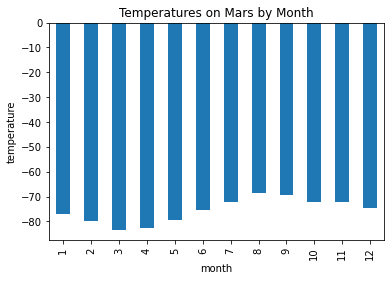

In [54]:
# Plot the average temperatures by month 
avg_month_temps.plot(kind="bar")
plt.ylabel("temperature")
plt.title("Temperatures on Mars by Month")
plt.show()

In [53]:
# State the coldest and warmest months on mars
print(f"The coldest month of the year is the 3rd month with a temperature of {min_temp}.\nThe warmest monthe of the year is the 8th month with a temperature of {max_temp}")

The coldest month of the year is the 3rd month with a temperature of -83.31.
The warmest monthe of the year is the 8th month with a temperature of -68.38


### (4) Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    - Find the average the daily atmospheric pressure of all the months.
    - Plot the results as a bar chart.

In [55]:
# average the atmospheric pressure on mars by grouping the data by month
avg_pressure = df_ready.groupby(df_ready["month"])["pressure"].mean()
avg_pressure

month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64

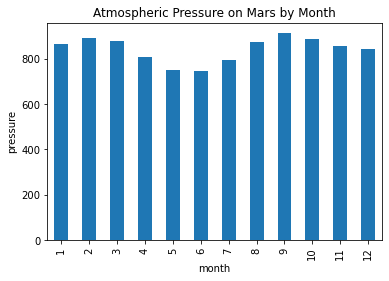

In [56]:
# Plot the average monthly pressure in a bar graph
avg_pressure.plot(kind="bar")
plt.ylabel("pressure")
plt.title("Atmospheric Pressure on Mars by Month")
plt.show()

In [59]:
# State the months with the lowest and highest atmospheric pressure
print(f"The 6th month has the lowest average atmospheric pressure of {round(avg_pressure.min(),2)}.\nThe 9th month has the highest average atmospheric pressure of {round(avg_pressure.max(),2)}")

The 6th month has the lowest average atmospheric pressure of 745.05.
The 9th month has the highest average atmospheric pressure of 913.31


### (5) About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    - Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    - Visually estimate the result by plotting the daily minimum temperature.

In [68]:
# make lists of the months and of the dates on earth
months = list(df_ready["month"])
earth_date = list(df_ready["terrestrial_date"])

In [69]:
# Find the earth_dates of the start of each 7th month on Mars

# Set first month to be 6 in accordance with the data and define an empty list to hold the Earth dates
dates_tracked = []
prev_month = 6

# Loop through the lists of months and earth dates by looping through their indecies (the lengths of the lists)
for x in range(len(months)):
    # If the current month is different from the previous month, need to check if it is the first day of the 7th month
    if prev_month != months[x]:
        # If the new month is the 7th, then the corresponding Earth date (the terrestrial date with the same index) must be stored          
        if months[x] == 7:  
            dates_tracked.append(earth_date[x])
        # change the previous month variable to be the new month if it has changed 
        prev_month = months[x]
    

In [70]:
# The earth date every time month 7 started 
dates_tracked

[Timestamp('2012-09-30 00:00:00'),
 Timestamp('2014-08-18 00:00:00'),
 Timestamp('2016-07-12 00:00:00')]

In [72]:
# store a start and stop date for a year on mars from the dates tacked for the start of the 7th month
year_start = dates_tracked[0]
year_end = dates_tracked[1]

In [75]:
# Calculate the time between the start and end of the year on mars
year = year_end - year_start

# The number of Earth days in a Martian year
print(f"The number of Earth days in a Martian year is approxicately {year}.")

The number of Earth days in a Martian year is approxicately 687 days 00:00:00.


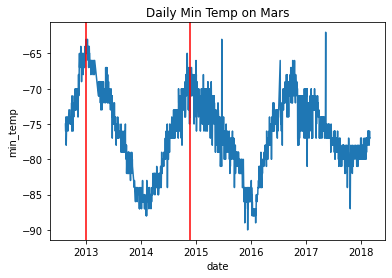

In [88]:
# plot the daily min temp
import datetime as dt

fig, ax = plt.subplots()
ax.plot(df_ready["terrestrial_date"], df_ready["min_temp"])

# Plot estimate peak "summer" times on mars to signal that a year has passed (a full period)
plt.axvline(x = dt.datetime(2012, 12, 30), color = 'r', label = 'axvline - full height')
plt.axvline(x = dt.datetime(2014, 11, 20), color = 'r', label = 'axvline - full height')

plt.xlabel("date")
plt.ylabel("min_temp")
plt.title("Daily Min Temp on Mars")

plt.show()



In [90]:
# Calculate the number of days passed between the visual estimates 
visual_estimate = dt.datetime(2014, 11, 20)-dt.datetime(2012, 12, 30)
print(f"A visual estimate for the number of earth days in a Martian year is {visual_estimate}. Hot dang my estimate was good.")

A visual estimate for the number of earth days in a Martian year is 690 days, 0:00:00. Hot dang my estimate was good


## Step 6: Save the Data

In [32]:
# Save the data to csv
df_ready.to_csv("mars_data.csv", index = True, header = True)

## Close the browser

In [16]:
browser.quit()